<a href="https://colab.research.google.com/github/Raghavendra1607/2303A51L41-AIML-B28/blob/main/Mental_Disorder_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import scipy.stats
from tabulate import tabulate
df=pd.read_csv("MentalDisorders.csv")
print(df)

    Patient Number     Sadness    Euphoric  Exhausted Sleep dissorder  \
0       Patiant-01     Usually      Seldom  Sometimes       Sometimes   
1       Patiant-02     Usually      Seldom    Usually       Sometimes   
2       Patiant-03   Sometimes  Most-Often  Sometimes       Sometimes   
3       Patiant-04     Usually      Seldom    Usually      Most-Often   
4       Patiant-05     Usually     Usually  Sometimes       Sometimes   
..             ...         ...         ...        ...             ...   
115    Patiant-116  Most-Often      Seldom    Usually       Sometimes   
116    Patiant-117   Sometimes   Sometimes  Sometimes          Seldom   
117    Patiant-118     Usually   Sometimes    Usually       Sometimes   
118    Patiant-119     Usually   Sometimes     Seldom          Seldom   
119    Patiant-120   Sometimes     Usually     Seldom         Usually   

    Mood Swing Suicidal thoughts Anorxia Authority Respect Try-Explanation  \
0          YES              YES       NO     

In [26]:
rows, columns = data.shape[0], data.shape[1]
print(f'Rowss: {rows}')
print(f'Columns: {columns}')

Rowss: 120
Columns: 19


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

In [29]:
data.describe()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,120,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Patiant-01,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,1,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [30]:
data.columns = data.columns.str.replace(" ", "_")
data.columns

Index(['Patient_Number', 'Sadness', 'Euphoric', 'Exhausted', 'Sleep_dissorder',
       'Mood_Swing', 'Suicidal_thoughts', 'Anorxia', 'Authority_Respect',
       'Try-Explanation', 'Aggressive_Response', 'Ignore_&_Move-On',
       'Nervous_Break-down', 'Admit_Mistakes', 'Overthinking',
       'Sexual_Activity', 'Concentration', 'Optimisim', 'Expert_Diagnose'],
      dtype='object')

In [31]:
data.duplicated().any()

False

In [32]:
data = data.drop("Patient_Number", axis = 1)
data.head()

,Sadness,Euphoric,Exhausted,Sleep_dissorder,Mood_Swing,Suicidal_thoughts,Anorxia,Authority_Respect,Try-Explanation,Aggressive_Response,Ignore_&_Move-On,Nervous_Break-down,Admit_Mistakes,Overthinking,Sexual_Activity,Concentration,Optimisim,Expert_Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [33]:
categorical_features = data.select_dtypes(include = ['object', 'category']).columns.to_list()
print(f'Total categorical features = {len(categorical_features)}')

Total categorical features = 18


In [34]:
for category_feat in categorical_features:
    print(f'* {category_feat}: {data[category_feat].unique()}\n')

* Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']

* Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']

* Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']

* Sleep_dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']

* Mood_Swing: ['YES' 'NO']

* Suicidal_thoughts: ['YES ' 'YES' 'NO']

* Anorxia: ['NO' 'YES']

* Authority_Respect: ['NO' 'YES']

* Try-Explanation: ['YES' 'NO']

* Aggressive_Response: ['NO' 'YES']

* Ignore_&_Move-On: ['NO' 'YES']

* Nervous_Break-down: ['YES' 'NO']

* Admit_Mistakes: ['YES' 'NO']

* Overthinking: ['YES' 'NO']

* Sexual_Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']

* Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']

* Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']

* Expert_Diagnose: ['Bipolar Type-2' 'Depression' 'B

In [35]:
data['Suicidal_thoughts'] = data['Suicidal_thoughts'].str.replace(" ", "")

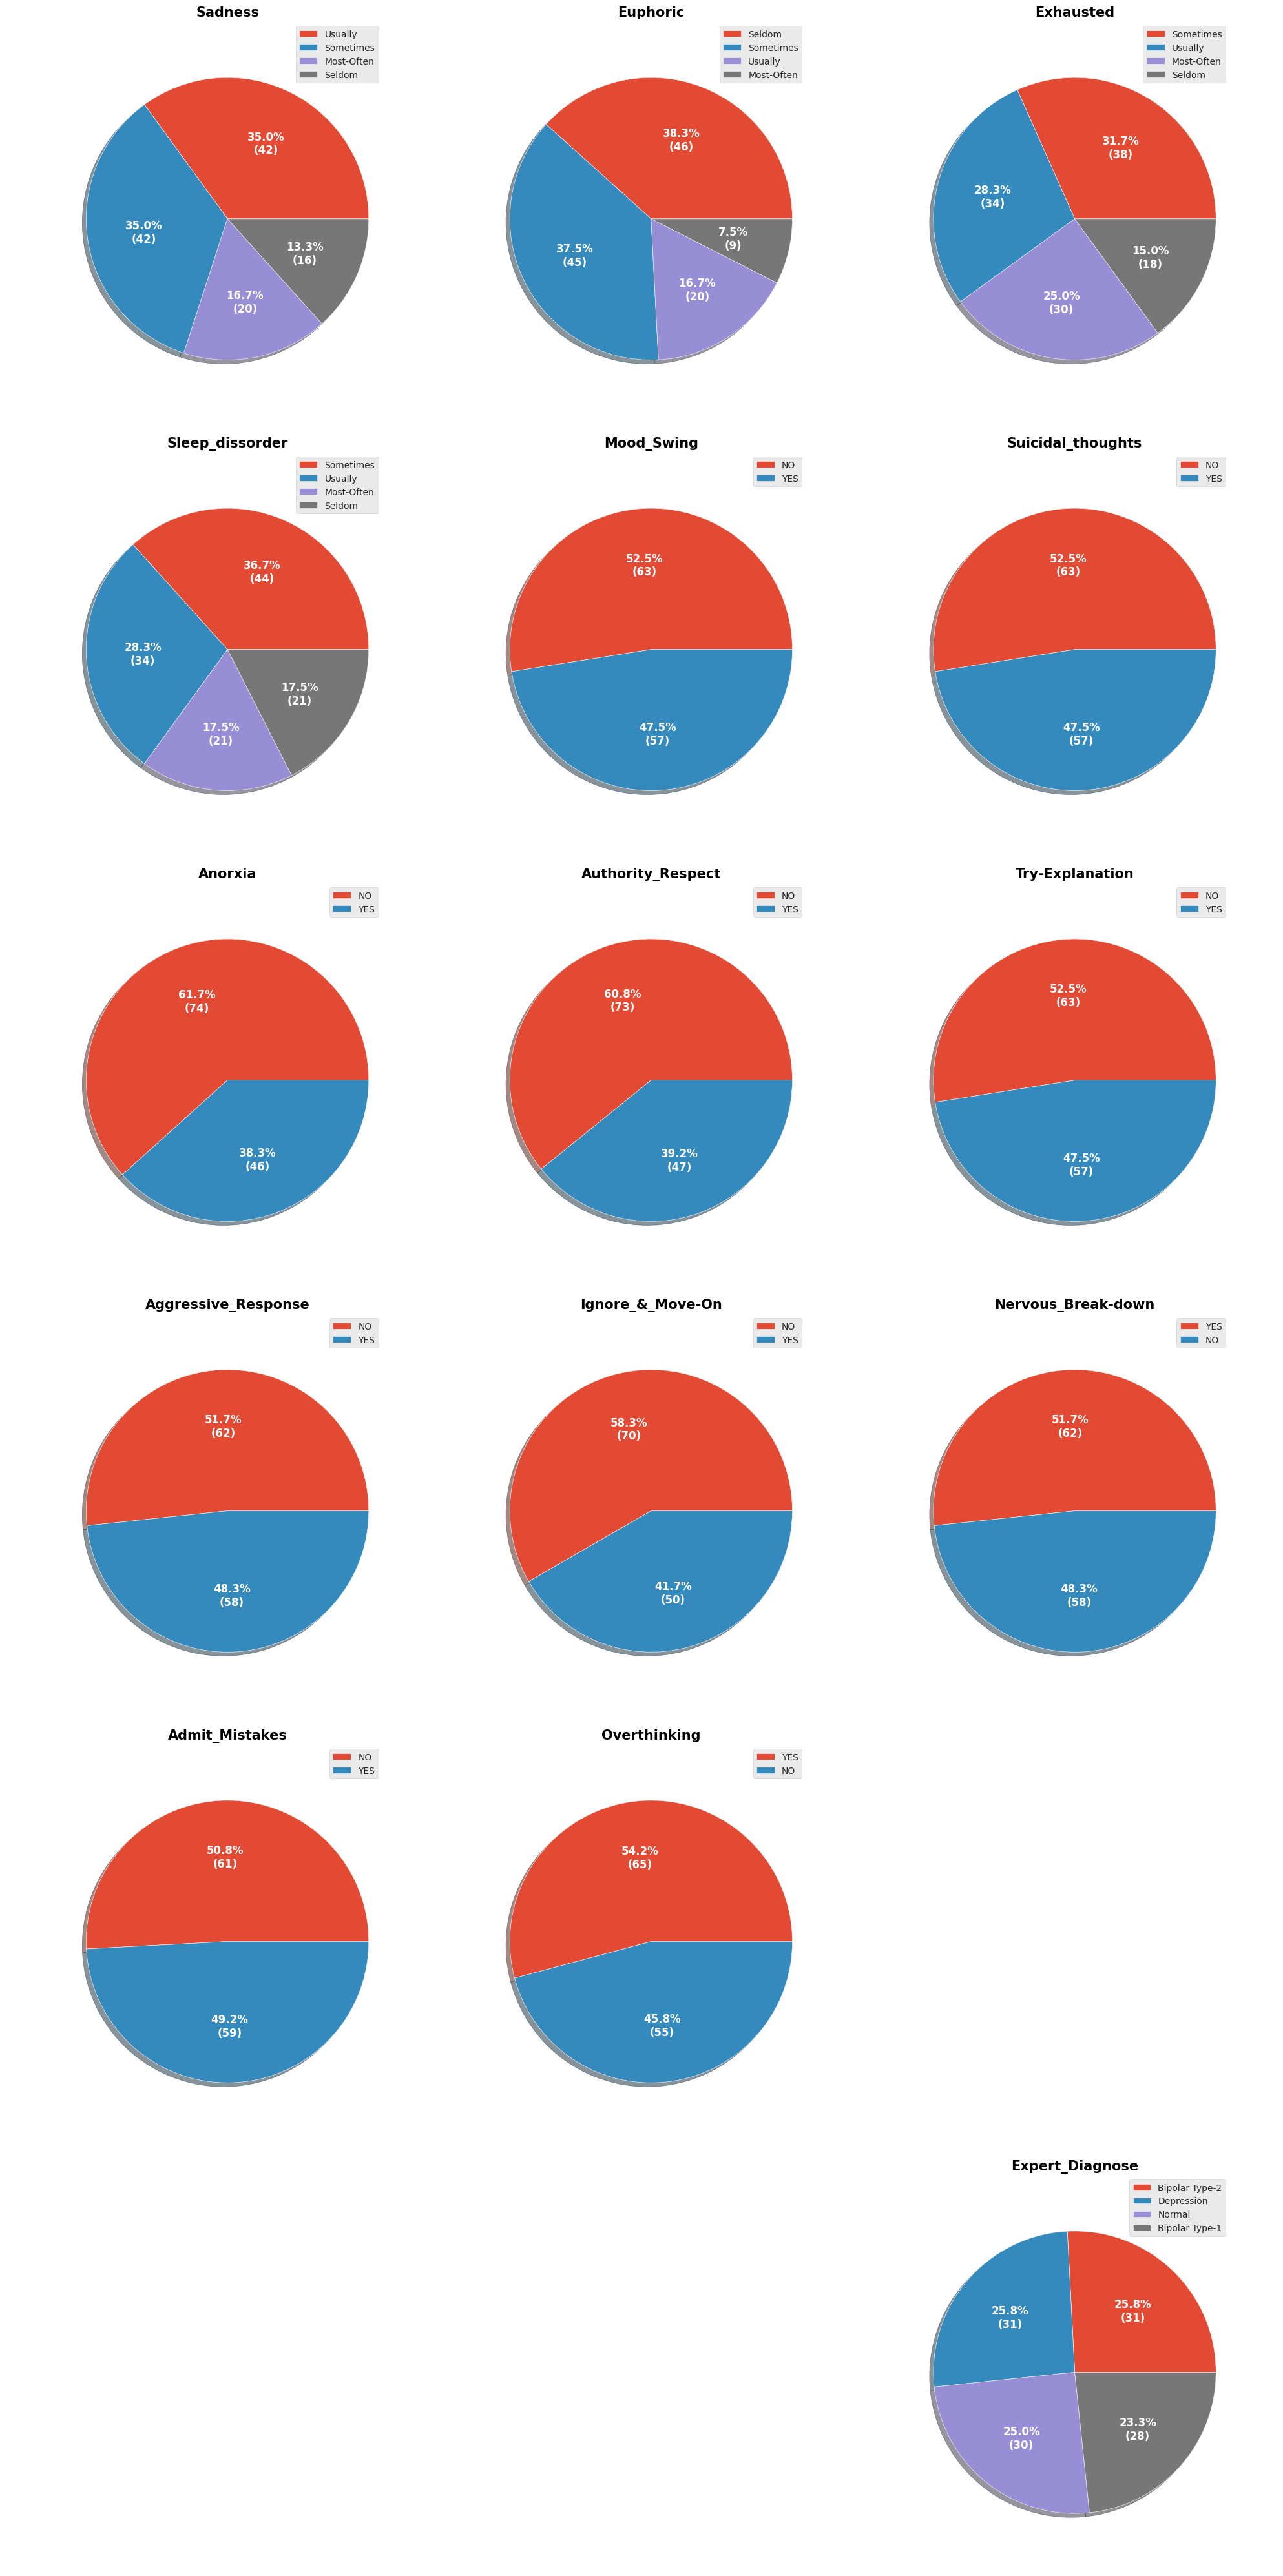

In [36]:
plt.style.use('ggplot')

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(nrows = 6, ncols = 3, figsize = (20,40))
ax = ax.flat

for i,cat_feat in enumerate(categorical_features):

    if cat_feat == 'Sexual_Activity' or cat_feat == 'Concentration' or cat_feat == 'Optimisim':
        continue

    df_class = data[cat_feat].value_counts().to_frame()
    labels = df_class.index
    values = df_class.iloc[:,0].to_list()
    ax[i].pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':12, 'fontweight':'bold'})
    ax[i].legend(labels, loc = 'best')
    ax[i].set_title(cat_feat, fontsize = 15, fontweight = "bold", color = "black")
    ax[i].axis('equal')

for j in [14,15,16]:
    fig.delaxes(ax = ax[j])

fig.tight_layout()
fig.show()


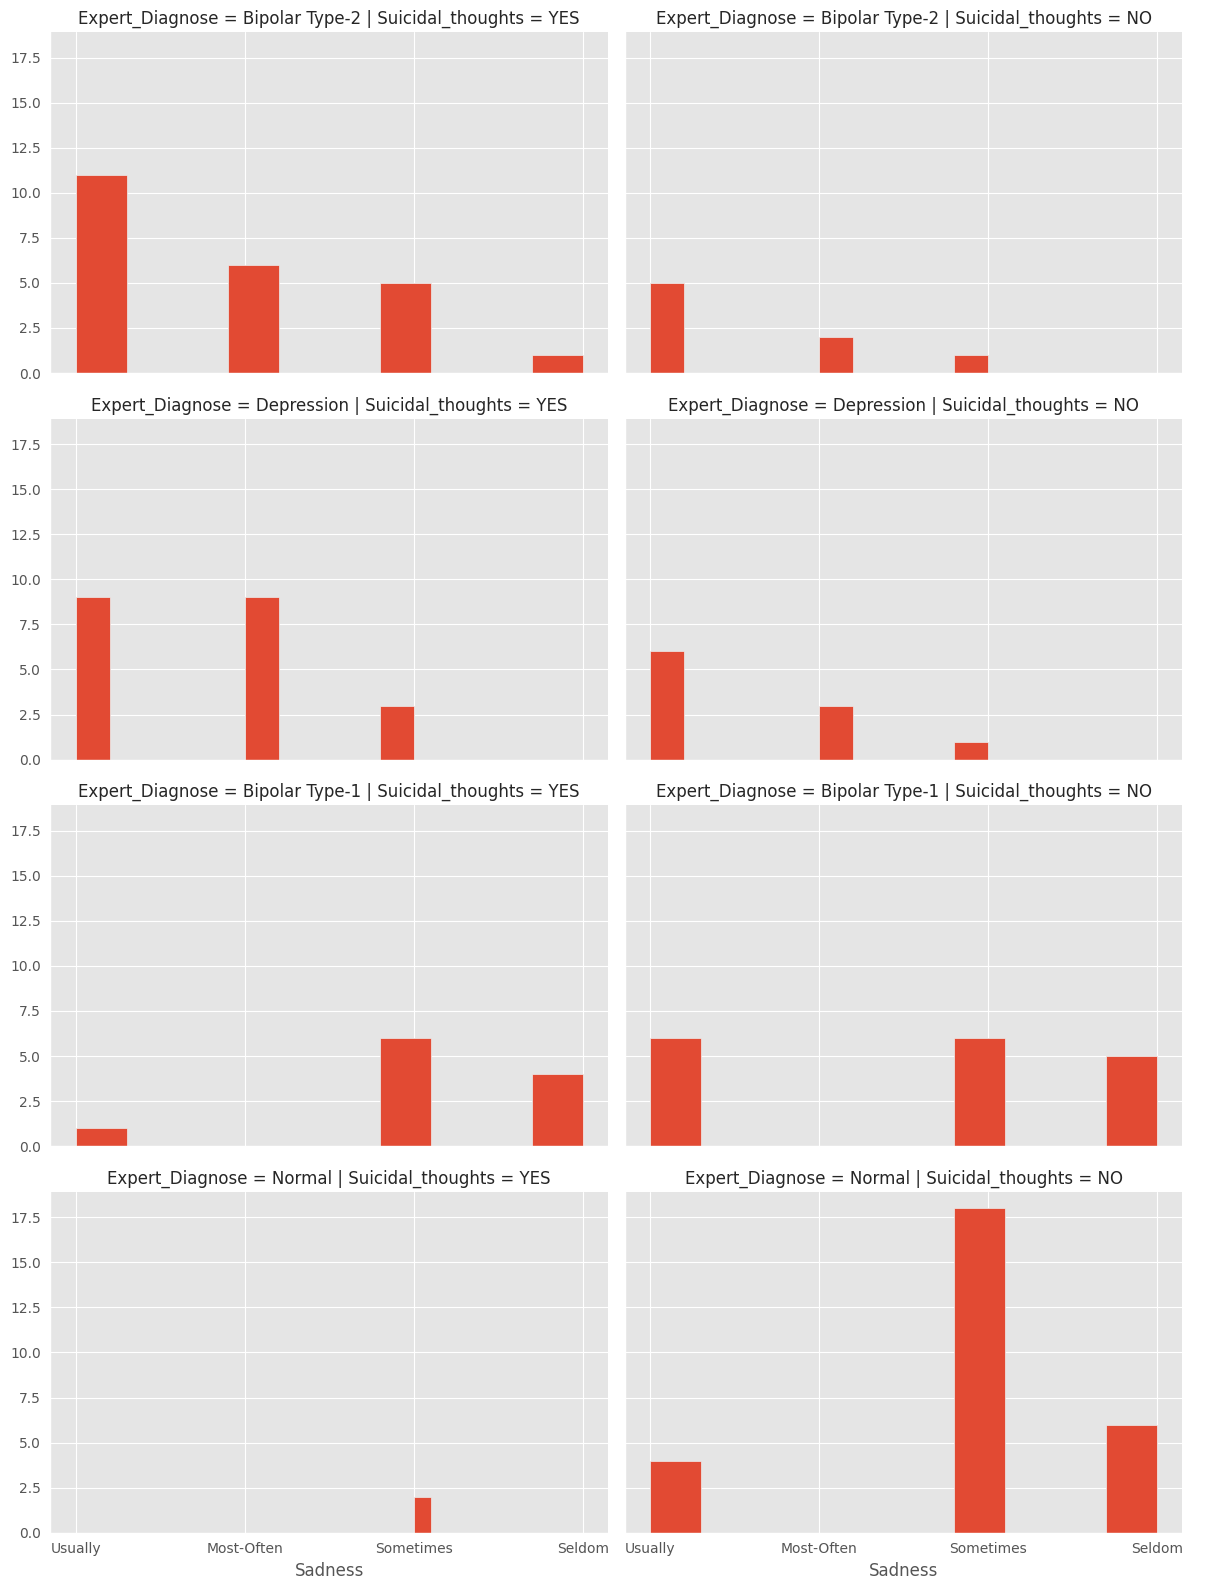

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

grid = sns.FacetGrid(data, col='Suicidal_thoughts', row='Expert_Diagnose', height=4, aspect=1.5)
grid.map(plt.hist, 'Sadness')
grid.add_legend()

plt.show()

In [38]:
LABELS = ['Depression', 'Normal', 'Bipolar Type-1', 'Bipolar Type-2']

label2id = dict(zip(LABELS, range(len(LABELS))))
label2id

{'Depression': 0, 'Normal': 1, 'Bipolar Type-1': 2, 'Bipolar Type-2': 3}

In [39]:
data['Expert_Diagnose'] = data['Expert_Diagnose'].map(label2id)

In [40]:
from sklearn.model_selection import train_test_split

X = data.drop('Expert_Diagnose', axis=1)  # Assuming 'Expert_Diagnose' is the target variable
y = data['Expert_Diagnose']

SEED = 1234

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=SEED)

In [41]:
y_train.value_counts()

Expert_Diagnose
3    24
2    20
1    20
0    20
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Expert_Diagnose
0    11
1    10
2     8
3     7
Name: count, dtype: int64

In [43]:
categorical_variables = X_train.select_dtypes(include = ['object','category']).columns.to_list()
categorical_variables

['Sadness',
 'Euphoric',
 'Exhausted',
 'Sleep_dissorder',
 'Mood_Swing',
 'Suicidal_thoughts',
 'Anorxia',
 'Authority_Respect',
 'Try-Explanation',
 'Aggressive_Response',
 'Ignore_&_Move-On',
 'Nervous_Break-down',
 'Admit_Mistakes',
 'Overthinking',
 'Sexual_Activity',
 'Concentration',
 'Optimisim']

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



# Define the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_variables)
], remainder='passthrough')

# Fit and transform the training data
X_train_prep = preprocessor.fit_transform(X_train)
# Transform the testing data
X_test_prep = preprocessor.transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=SEED)

# Fit the classifier to the training data
rf_classifier.fit(X_train_prep, y_train)

# Predict the target labels for the training and testing data
y_pred_train_rf = rf_classifier.predict(X_train_prep)
y_pred_test_rf = rf_classifier.predict(X_test_prep)

# Compute the accuracy of the model on the training and testing data
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Random Forest - Accuracy Train: {accuracy_train_rf:.4f}")
print(f"Random Forest - Accuracy Test: {accuracy_test_rf:.4f}")


Random Forest - Accuracy Train: 1.0000
Random Forest - Accuracy Test: 0.8056


Logistic Regression model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the Logistic Regression model
lr_model = LogisticRegression(random_state=SEED)

# Train the model
lr_model.fit(X_train_prep, y_train)

# Predictions
y_pred_train_lr = lr_model.predict(X_train_prep)
y_pred_test_lr = lr_model.predict(X_test_prep)

# Evaluate the model
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print(f"Logistic Regression - Accuracy Train: {accuracy_train_lr:.4f}")
print(f"Logistic Regression - Accuracy Test: {accuracy_test_lr:.4f}")

Logistic Regression - Accuracy Train: 1.0000
Logistic Regression - Accuracy Test: 0.8056


In [47]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Initialize Support Vector Machine classifier
svm_classifier = SVC(random_state=SEED)

# Fit SVM classifier to the training data
svm_classifier.fit(X_train_prep, y_train)

# Predict target labels for training and testing data using SVM
y_pred_train_svm = svm_classifier.predict(X_train_prep)
y_pred_test_svm = svm_classifier.predict(X_test_prep)

# Calculate accuracy of SVM model on training and testing data
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print(f"SVM - Accuracy Train: {accuracy_train_svm:.4f}")
print(f"SVM - Accuracy Test: {accuracy_test_svm:.4f}")

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=SEED)

# Fit Gradient Boosting classifier to the training data
gb_classifier.fit(X_train_prep, y_train)

# Predict target labels for training and testing data using Gradient Boosting
y_pred_train_gb = gb_classifier.predict(X_train_prep)
y_pred_test_gb = gb_classifier.predict(X_test_prep)

# Calculate accuracy of Gradient Boosting model on training and testing data
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

print(f"Gradient Boosting - Accuracy Train: {accuracy_train_gb:.4f}")
print(f"Gradient Boosting - Accuracy Test: {accuracy_test_gb:.4f}")

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=SEED)

# Fit XGBoost classifier to the training data
xgb_classifier.fit(X_train_prep, y_train)

# Predict target labels for training and testing data using XGBoost
y_pred_train_xgb = xgb_classifier.predict(X_train_prep)
y_pred_test_xgb = xgb_classifier.predict(X_test_prep)

# Calculate accuracy of XGBoost model on training and testing data
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print(f"XGBoost - Accuracy Train: {accuracy_train_xgb:.4f}")
print(f"XGBoost - Accuracy Test: {accuracy_test_xgb:.4f}")

SVM - Accuracy Train: 1.0000
SVM - Accuracy Test: 0.8056
Gradient Boosting - Accuracy Train: 1.0000
Gradient Boosting - Accuracy Test: 0.7222
XGBoost - Accuracy Train: 1.0000
XGBoost - Accuracy Test: 0.7778


In [52]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.8 MB/s eta 0:00:00


CatBoostClassifier Model

In [53]:
from catboost import CatBoostClassifier

# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier(random_state=SEED)

# Fit CatBoost classifier to the training data
catboost_classifier.fit(X_train_prep, y_train)

# Predict target labels for training and testing data using CatBoost
y_pred_train_catboost = catboost_classifier.predict(X_train_prep)
y_pred_test_catboost = catboost_classifier.predict(X_test_prep)

# Calculate accuracy of CatBoost model on training and testing data
accuracy_train_catboost = accuracy_score(y_train, y_pred_train_catboost)
accuracy_test_catboost = accuracy_score(y_test, y_pred_test_catboost)

print(f"CatBoost - Accuracy Train: {accuracy_train_catboost:.4f}")
print(f"CatBoost - Accuracy Test: {accuracy_test_catboost:.4f}")

Learning rate set to 0.069737
0:	learn: 1.3420461	total: 51.4ms	remaining: 51.3s
1:	learn: 1.3042434	total: 55.2ms	remaining: 27.6s
2:	learn: 1.2684499	total: 59.2ms	remaining: 19.7s
3:	learn: 1.2239059	total: 63.1ms	remaining: 15.7s
4:	learn: 1.1989624	total: 67.1ms	remaining: 13.3s
5:	learn: 1.1637892	total: 71.4ms	remaining: 11.8s
6:	learn: 1.1353193	total: 76.4ms	remaining: 10.8s
7:	learn: 1.1127401	total: 80.3ms	remaining: 9.96s
8:	learn: 1.0888062	total: 84.2ms	remaining: 9.27s
9:	learn: 1.0582520	total: 85.6ms	remaining: 8.48s
10:	learn: 1.0313888	total: 89.5ms	remaining: 8.05s
11:	learn: 1.0132799	total: 93.4ms	remaining: 7.69s
12:	learn: 0.9869914	total: 97.4ms	remaining: 7.39s
13:	learn: 0.9676973	total: 101ms	remaining: 7.15s
14:	learn: 0.9482230	total: 105ms	remaining: 6.92s
15:	learn: 0.9250899	total: 109ms	remaining: 6.72s
16:	learn: 0.9058613	total: 113ms	remaining: 6.55s
17:	learn: 0.8842861	total: 117ms	remaining: 6.39s
18:	learn: 0.8686245	total: 121ms	remaining: 6.25

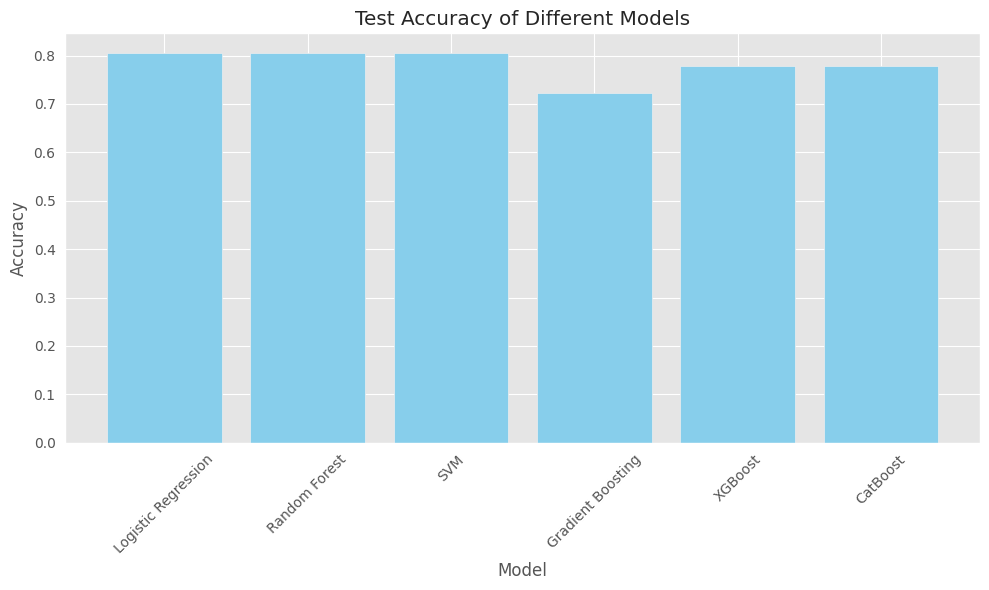

In [54]:
import matplotlib.pyplot as plt

# List of model names
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost', 'CatBoost']

# List of test accuracies for each model
test_accuracies = [accuracy_test_lr, accuracy_test_rf, accuracy_test_svm, accuracy_test_gb, accuracy_test_xgb, accuracy_test_catboost]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color='skyblue')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of Different Models')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd
from sklearn.metrics import classification_report

# Create a dictionary to store classification reports
classification_reports = {}

# Generate classification report for Logistic Regression
classification_reports['Logistic Regression'] = classification_report(y_test, y_pred_test_lr, output_dict=True)

# Generate classification report for Random Forest
classification_reports['Random Forest'] = classification_report(y_test, y_pred_test_rf, output_dict=True)

# Generate classification report for SVM
classification_reports['SVM'] = classification_report(y_test, y_pred_test_svm, output_dict=True)

# Generate classification report for Gradient Boosting
classification_reports['Gradient Boosting'] = classification_report(y_test, y_pred_test_gb, output_dict=True)

# Generate classification report for XGBoost
classification_reports['XGBoost'] = classification_report(y_test, y_pred_test_xgb, output_dict=True)

# Generate classification report for CatBoost
classification_reports['CatBoost'] = classification_report(y_test, y_pred_test_catboost, output_dict=True)

# Create DataFrame from the classification reports
df_classification_reports = pd.DataFrame(classification_reports).T

# Display the DataFrame
print(df_classification_reports)

                                                                     0  \
Logistic Regression  {'precision': 0.9166666666666666, 'recall': 1....   
Random Forest        {'precision': 0.9090909090909091, 'recall': 0....   
SVM                  {'precision': 0.9090909090909091, 'recall': 0....   
Gradient Boosting    {'precision': 0.9, 'recall': 0.818181818181818...   
XGBoost              {'precision': 0.9166666666666666, 'recall': 1....   
CatBoost             {'precision': 0.9090909090909091, 'recall': 0....   

                                                                     1  \
Logistic Regression  {'precision': 1.0, 'recall': 0.7, 'f1-score': ...   
Random Forest        {'precision': 1.0, 'recall': 0.8, 'f1-score': ...   
SVM                  {'precision': 1.0, 'recall': 0.8, 'f1-score': ...   
Gradient Boosting    {'precision': 1.0, 'recall': 0.6, 'f1-score': ...   
XGBoost              {'precision': 1.0, 'recall': 0.8, 'f1-score': ...   
CatBoost             {'precision': 0.